<a href="https://colab.research.google.com/github/HarrisonGrubb/python-business-analytics/blob/master/Reddit_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

Reading in the needed packages and setting up the project.

In [ ]:
%%capture
!pip install praw
!pip install PyDrive
!pip install gensim
!pip install pyldavis
!pip install spacy

In [ ]:
import praw
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
from google.colab import drive
import time
import os
import nltk
from nltk import FreqDist
import json
import re
import gzip
import spacy
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
%matplotlib inline
nltk.download('stopwords')
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Mounted at /content/drive


In [ ]:
reddit = praw.Reddit(client_id="******",
                     client_secret="******",
                     user_agent="******",
                     username="******",
                     password="*******")


In [ ]:
reddit.read_only = True

In [ ]:
url = "https://www.reddit.com/r/wallstreetbets/comments/iqr5ay/the_real_small_shopify_lspd_first_trading_day/"
car_url = "https://www.reddit.com/r/cars/comments/isivb9/weekly_what_car_should_i_buy_megathread/"

car_url_list_1 = ["https://www.reddit.com/r/cars/comments/io5k86/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/isivb9/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/ijw16f/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/ifmz8m/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/ibc5m8/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/i2v5a9/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/i72v2h/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/hyqby2/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/hqdehp/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/hujg9l/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/hm5puf/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/hdqg0v/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/hhxylc/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/gyxed5/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/gq96qj/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/guir6l/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/guir6l/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/gq96qj/weekly_what_car_should_i_buy_megathread/",
                "https://www.reddit.com/r/cars/comments/glzi7z/weekly_what_car_should_i_buy_megathread/",
                'https://www.reddit.com/r/cars/comments/8eanyj/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8fyopa/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8ogg6z/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8hmpcx/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8jbff6/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8tpo10/weekly_what_car_should_i_buy_megathread/']

car_url_list_2 = [
                'https://www.reddit.com/r/cars/comments/8l00uc/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8q8pof/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8ryp5n/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/950emi/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8vhtoe/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8xam8p/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9em4rw/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9ckn14/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/8za1s3/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/96xfvm/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/98sp0x/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9336o0/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9165l0/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9mdye5/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9ih1da/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9uco61/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9kffcy/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9gjem2/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9sc5ik/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/a6yxti/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/ab699r/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/9yfvdx/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/a4usor/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/a946bv/weekly_what_car_should_i_buy_megathread/']

car_url_list_3 = [
                'https://www.reddit.com/r/cars/comments/a2nqla/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/a0iggg/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/adgqw3/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/ai96i7/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/an0p6g/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/akmht8/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/arw7l6/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/ax5znc/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/auk4r1/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/b2hfqw/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/basi5c/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/b59clf/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/bg0u70/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/bio8w0/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/blat20/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/bdeqk7/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/bqu6ok/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/bo24te/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/bywl0f/weekly_what_car_should_i_buy_megathread/',
                'https://www.reddit.com/r/cars/comments/c1mb15/weekly_what_car_should_i_buy_megathread/']

car_url_list_4 = [
                  'https://www.reddit.com/r/cars/comments/4tm196/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/4wx2pj/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/4y0efo/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5xbecn/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/4qabur/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/4z7cuk/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5kkjpl/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5i4j9b/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5fjlbn/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5wozi0/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5je60t/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/65wpvd/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5r97hf/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6e1dcb/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5px2z9/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/60hmpd/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6mfozo/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6l12mf/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6cog1m/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/637zhk/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5z634n/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5lstyk/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6ffex2/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6i7nx8/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5xu9oe/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/69za9z/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/68n3wg/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6jmbht/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6bbj1o/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/73u0as/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/72dq1p/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6qpp27/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5u16yw/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6s6tsp/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5vcg9p/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/61tbtm/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/5smddg/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6nubd5/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6v47yw/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6zgmym/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/75adpd/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/75adpd/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6p9nc5/weekly_what_car_should_i_buy_mega_thread/',
                  'https://www.reddit.com/r/cars/comments/6tnp91/weekly_what_car_should_i_buy_mega_thread/']

In [ ]:
df = pd.DataFrame(columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])

In [ ]:
submission = reddit.submission(url=car_url_list_2[2])
comments = submission.comments.replace_more()
df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
  

In [ ]:
temp_df.head()

,Parent ID,Comment ID,Score,Created,Body


In [ ]:
temp_df.shape

(0, 5)

# Accumulating Reddit Comments

In [ ]:
loop_count = 0

for link in car_url_list_1:
  time.sleep(3)
  try:
    submission = reddit.submission(url=link)
    comments = submission.comments
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save1.csv')
    loop_count += 1
    print(loop_count)
  except:
    submission = reddit.submission(url=link)
    comments = submission.comments.replace_more(limit=None)
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save1.csv')
    loop_count += 1
    print(loop_count)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [ ]:
df = pd.DataFrame(columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])


In [ ]:
# loop_count = 0

for link in car_url_list_2:
  time.sleep(3)
  try:
    submission = reddit.submission(url=link)
    comments = submission.comments
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save2.csv')
    loop_count += 1
    print(loop_count)
  except:
    submission = reddit.submission(url=link)
    comments = submission.comments.replace_more(limit=None)
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save2.csv')
    loop_count += 1
    print(loop_count)
 
 
  # submission = reddit.submission(url=link)
  # comments = submission.comments.replace_more(limit=None)
  # df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
  # temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
  # df = df.append(temp_df)
  # df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save2.csv')
  # loop_count += 1
  # print(loop_count)
  # time.sleep(3)

26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
df = pd.DataFrame(columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])


In [ ]:
loop_count = 0

for link in car_url_list_3:
  time.sleep(3)
  try:
    submission = reddit.submission(url=link)
    comments = submission.comments
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save3.csv')
    loop_count += 1
    print(loop_count)
  except:
    submission = reddit.submission(url=link)
    comments = submission.comments.replace_more(limit=None)
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save3.csv')
    loop_count += 1
    print(loop_count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
df = pd.DataFrame(columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])


In [ ]:
loop_count = 0

for link in car_url_list_4:
  time.sleep(3)
  try:
    submission = reddit.submission(url=link)
    comments = submission.comments
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save4.csv')
    loop_count += 1
    print(loop_count)
  except:
    submission = reddit.submission(url=link)
    comments = submission.comments.replace_more(limit=None)
    df_rows = [[comment.parent, comment.id, comment.score, comment.created, comment.body] for comment in comments]
    temp_df = pd.DataFrame(df_rows, columns=['Parent ID', 'Comment ID', 'Score', 'Created', 'Body'])
    df = df.append(temp_df)
    df.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save4.csv')
    loop_count += 1
    print(loop_count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


# Reading In Saved Data and cleaning it

In [ ]:
links_1 = pd.read_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save1.csv')
links_2 = pd.read_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save2.csv')
links_3 = pd.read_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save3.csv')
links_4 = pd.read_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/df_save4.csv')

In [ ]:
df = links_1

In [ ]:
df = df.append(links_2)
df = df.append(links_3)
df = df.append(links_4)

In [ ]:
df2 = df

In [ ]:
df2['Body'] = df2['Body'].str.lower()

In [ ]:
df2.shape

(9468, 6)

In [ ]:
to_remove = ['>', '*', '\n', '\xa0']

In [ ]:
df2 = df2.dropna(subset=['Body'])

In [ ]:
df2.Body = df2.Body.str.replace('>', '')
df2.Body = df2.Body.str.replace('*', '')
df2.Body = df2.Body.str.replace('\n', '')
df2.Body = df2.Body.str.replace('\xa0', '')
df2.Body = df2.Body.str.replace('!', '')
df2.Body = df2.Body.str.replace('hello', '')
df2.Body = df2.Body.str.replace('â€¢' , '') 
df2.Body = df2.Body.str.replace('location -', 'location:')
df2.Body = df2.Body.str.replace('range -', 'range:')
df2.Body = df2.Body.str.replace('considered -', 'considered:') 
df2.Body = df2.Body.str.replace('(specify your country or region)', 'location:')

In [ ]:
df2.head(15)

,Unnamed: 0,Parent ID,Comment ID,Score,Created,Body
0,0,<bound method Comment.parent of Comment(id='g4...,g4bttij,6,1.599514e+09,location: western ny - it snows a lotprice ran...
1,1,<bound method Comment.parent of Comment(id='g4...,g4d6ngv,4,1.599535e+09,"location: texas, price range: 30-50k, type: wa..."
2,2,<bound method Comment.parent of Comment(id='g4...,g4qjfh6,4,1.599796e+09,location: southeast usaprice range: max of 25k...
3,3,<bound method Comment.parent of Comment(id='g4...,g4bwsvs,3,1.599516e+09,location: philadelphia paprice range: $8k - $1...
4,4,<bound method Comment.parent of Comment(id='g4...,g4i7z8j,3,1.599645e+09,"location: new england, us price range: mont..."
5,5,<bound method Comment.parent of Comment(id='g4...,g4uumh0,3,1.599882e+09,location: northeastern usprice range: $20k max...
6,6,<bound method Comment.parent of Comment(id='g4...,g4x48ei,3,1.599938e+09,location: southern californiaprice range: both...
7,7,<bound method Comment.parent of Comment(id='g4...,g4d10th,2,1.599533e+09,how underwater on a loan would you say a perso...
8,8,<bound method Comment.parent of Comment(id='g4...,g4exlsl,2,1.599571e+09,location: georgia price range: 0-10k usd lea...
9,9,<bound method Comment.parent of Comment(id='g4...,g4hflsu,2,1.599630e+09,location: united states - south west&#x200b;pr...


In [ ]:
range(0,df2.shape[0])

range(0, 9468)

In [ ]:
df2['Location'] = df2['Body'].str.split('location:').str[1]
df2['Location'] = df2['Location'].str.split('price').str[0]

df2['Price'] = df2['Body'].str.split('range:').str[1]
df2['Price'] = df2['Price'].str.split('lease').str[0]

df2['buy'] = df2['Body'].str.split('range:').str[1]
df2['buy'] = df2['buy'].str.split('lease').str[0]

df2['set'] = df2['Body'].str.split('considered:').str[1]
df2['set'] = df2['set'].str.split('is').str[0]


In [ ]:
df2 = df2.dropna(subset=['set'])
df2 = df2[~df2['set'].str.contains('n/a')]
df2 = df2[~df2['set'].str.contains('none')]
df2 = df2[~df2['set'].str.contains('nothing')]
df2 = df2[~df2['set'].str.contains('currently')]
df2 = df2[~df2['set'].str.contains('i am')]
df2 = df2[~df2['set'].str.contains('gene')]
df2 = df2[~df2['set'].str.contains("haven't")]
df2 = df2[~df2['set'].str.contains("i'm")]
df2 = df2[~df2['set'].str.contains("i've")]
df2 = df2[~df2['set'].str.contains("don't")]
df2 = df2[~df2['set'].str.contains("repair")]
print(df2.shape)

honda_df = df2[df2['set'].str.contains('honda')]
audi_df = df2[df2['set'].str.contains('audi')]
toyota_df = df2[df2['set'].str.contains('toyota')]

car_stop_words = ['repair', 'maintenance', 'nocan', 'yescan', 'major', 'note', 'car', 'last', 'minor', 'lol', 'lot', 'old', 'yeswarranty', 'nowarranty']

honda_stop_words = ['honda']

(4685, 10)


In [ ]:
print('honda df size', honda_df.shape)
print('audi df size', audi_df.shape)
print('toyota df size', toyota_df.shape)

honda df size (779, 10)
audi df size (439, 10)
toyota df size (650, 10)


In [ ]:
# df2['set'] = df2['set'].astype(str)
# df2['set'] = df2['set'].apply(lambda x: x[1:-1].split(','))

In [ ]:
df2.tail(15)

,Unnamed: 0,Parent ID,Comment ID,Score,Created,Body,Location,Price,buy,set
3655,92,<bound method Comment.parent of Comment(id='dl...,dlusowr,1,1.503203e+09,location: northern oklahoma price range: 5k us...,northern oklahoma,5k usd new or used: usedtype of vehicle: old ...,5k usd new or used: usedtype of vehicle: old ...,"2000 honda accord, 2000 silverado"
3656,93,<bound method Comment.parent of Comment(id='dl...,dluuy1b,1,1.503206e+09,"location: toronto, canada price range: 6k-10k...","toronto, canada",6k-10k cad new or used: used type of vehicle:...,6k-10k cad new or used: used type of vehicle:...,"2013+ fiat 500, 2010+ mini cooper, 2011+ golf"
3660,97,<bound method Comment.parent of Comment(id='dl...,dlwl20s,1,1.503306e+09,location: va price range: 15k-28k new or used...,va,15k-28k new or used: new type of vehicle: tru...,15k-28k new or used: new type of vehicle: tru...,"2017 chevy colorado, 2017 honda cr-v1."
3661,98,<bound method Comment.parent of Comment(id='dl...,dlx9uby,1,1.503353e+09,"location: stuart, flprice range: under $12knew...","stuart, fl","under $12knew or used: either, but i'm pretty...","under $12knew or used: either, but i'm pretty...","right now i have it narrowed down to 7 cars, ..."
3664,101,<bound method Comment.parent of Comment(id='dl...,dls69qr,1,1.503052e+09,"location: melbourne, but willing to travel to ...","melbourne, but willing to travel to sa/nsw",20-25knew or used: eithertype of vehicle: spo...,20-25knew or used: eithertype of vehicle: spo...,"a5, tt, q37"
3666,103,<bound method Comment.parent of Comment(id='dl...,dlsxxjm,1,1.503100e+09,so someone ran a stop sign and totalled the mu...,"california, usa","dont want to spend over 18,000 usdnew or used...","dont want to spend over 18,000 usdnew or used...","camaro ss, c5, c6 with miles"
3667,104,<bound method Comment.parent of Comment(id='dl...,dlszqea,1,1.503102e+09,"•location: ohio•price range: < $55,000•new or ...",ohio•,"< $55,000•new or used:new or cpo•type of vehi...","< $55,000•new or used:new or cpo•type of vehi...","wrx sti, mazdaspeed 3, tesla model 3. •cant h..."
3668,105,<bound method Comment.parent of Comment(id='dl...,dlt0kna,1,1.503103e+09,#note: this is for either a 2-car or 1-car so...,"nc, usa","~$650/mo, +/- $100 for the right solutionnew ...","~$650/mo, +/- $100 for the right solutionnew ...","bmw m2, honda s2000 + hyundai sonata, focus r..."
3669,106,<bound method Comment.parent of Comment(id='dl...,dlt841e,1,1.503112e+09,location: minnesota price range: $20-29 knew o...,minnesota,$20-29 knew or used: usedtype of vehicle: sed...,$20-29 knew or used: usedtype of vehicle: sed...,2013 audi a6 3.0t
3671,108,<bound method Comment.parent of Comment(id='dl...,dltgc9x,1,1.503121e+09,"location: illinoisprice range: 25,000-35,000ne...",illinois,"25,000-35,000new or used: new type of vehicl...","25,000-35,000new or used: new type of vehicl...","subaru forester, toyota camry, honda accord, ..."


In [ ]:
df2.to_csv('cars.csv')

# Turning Data into Insights

## Attempt 1: trying to create co-occurence matrix

In [ ]:
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index

In [ ]:
text_data = [['Where', 'Python', 'is', 'used'],
             ['What', 'is', 'Python' 'used', 'in'],
             ['Why', 'Python', 'is', 'best'],
             ['What', 'companies', 'use', 'Python']]

In [ ]:
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
print(data_matrix)

            companies  What  Where   is  ...  Pythonused  Python  best  used
companies         0.0   1.0    0.0  0.0  ...         0.0     0.0   0.0   0.0
What              0.0   0.0    0.0  0.0  ...         0.0     0.0   1.0   1.0
Where             0.0   0.0    0.0  0.0  ...         0.0     0.0   0.0   0.0
is                0.0   1.0    0.0  0.0  ...         0.0     2.0   0.0   0.0
in                0.0   0.0    0.0  0.0  ...         1.0     0.0   0.0   0.0
Why               0.0   0.0    0.0  0.0  ...         0.0     0.0   0.0   0.0
use               1.0   0.0    0.0  0.0  ...         0.0     0.0   0.0   0.0
Pythonused        0.0   0.0    0.0  1.0  ...         0.0     0.0   0.0   0.0
Python            0.0   0.0    1.0  0.0  ...         0.0     0.0   0.0   0.0
best              0.0   0.0    0.0  1.0  ...         0.0     0.0   0.0   0.0
used              0.0   0.0    0.0  1.0  ...         0.0     0.0   0.0   0.0

[11 rows x 11 columns]


In [ ]:
data = list(itertools.chain.from_iterable(df2['set']))

In [ ]:
matrix, vocab_index = generate_co_occurrence_matrix(data)

In [ ]:
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)


In [ ]:
print(data_matrix)

                                                         ...  bmw 5series
                                                    8.0  ...          0.0
dodge charger but don’t know if it’s a good ide...  0.0  ...          0.0
 water pump                                         0.0  ...          0.0
 bmw 3 series                                       0.0  ...          0.0
 subaru forester and outback •                      0.0  ...          0.0
...                                                 ...  ...          ...
- acura tl                                          0.0  ...          0.0
 2020 kia telluride sx awd prestige packag          0.0  ...          0.0
vw gli                                              0.0  ...          0.0
 07+ mazdaspeed3                                    0.0  ...          0.0
bmw 5series                                         0.0  ...          0.0

[8244 rows x 8244 columns]


In [ ]:
data_matrix.to_csv('/content/drive/My Drive/Kaggle Contest Data/Car Data/data.csv')

## Attempt 2: Topic Modeling

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

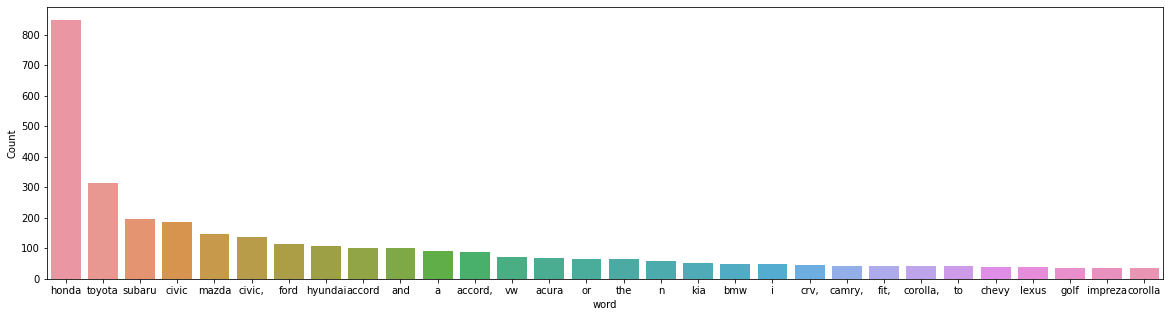

In [ ]:
freq_words(honda_df['set'], terms=30)

In [ ]:
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [ ]:
stop_words = stopwords.words('english')
car_stop_words.append('honda')

for word in car_stop_words:
  stop_words.append(word)


In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
text = [remove_stopwords(r.split()) for r in honda_df['set']]

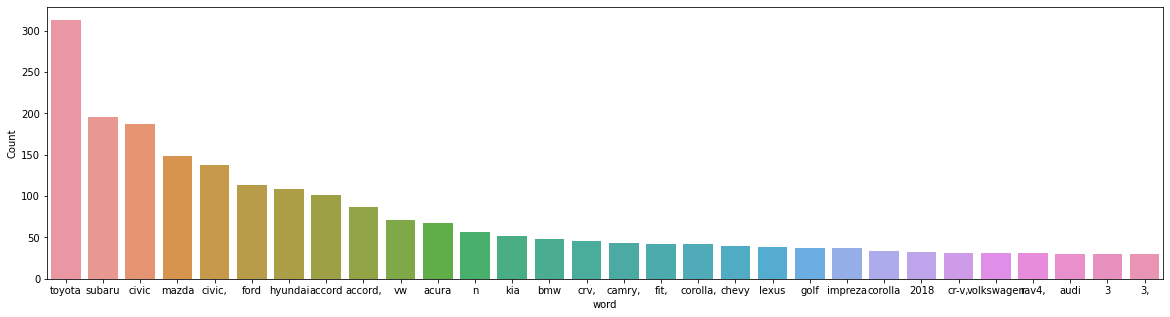

In [ ]:
freq_words(text, terms=30)

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [ ]:
tokenized_reviews = pd.Series(text).apply(lambda x: x.split())
print(tokenized_reviews[1])

['hyundai', 'ioniq,', 'civic,', 'hyundai', 'volester', '(i', 'really', 'like', 'design', 'th']


In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

['design']


In [ ]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'(i', 'civic,', 'hyundai', 'ioniq,', 'like', 'really', 'th', 'volester'}

In [ ]:
dictionary = corpora.Dictionary(reviews_2)

# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
%%capture
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=8, 
                random_state=100,
                chunksize=1000,
                passes=200)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.189470 -0.015059       1        1  15.537196
5     -0.132462 -0.075096       2        1  13.670248
1     -0.024114  0.203450       3        1  13.546859
3     -0.010642  0.086358       4        1  13.304307
7      0.117844 -0.112184       5        1  12.489058
0      0.108269 -0.054363       6        1  12.172490
4     -0.047240  0.072641       7        1   9.942311
6     -0.201126 -0.105747       8        1   9.337526, topic_info=         Term       Freq      Total Category  logprob  loglift
4       civic  62.000000  62.000000  Default  30.0000  30.0000
113     pilot  23.000000  23.000000  Default  29.0000  29.0000
3        work  23.000000  23.000000  Default  28.0000  28.0000
10     accord  28.000000  28.000000  Default  27.0000  27.0000
43    vehicle  25.000000  25.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
254    lancer   0.843635   2.292851   Topic8  -4.9137   1.3713
59      focus   0.843580   3.019918   Topic8  -4.9137   1.0958
212      note   2.343610   8.461600   Topic8  -3.8919   1.0873
9       model   2.343550  11.305365   Topic8  -3.8920   0.7975
2    véhicule   0.094656   1.464834   Topic8  -7.1011  -0.3681

[421 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
408       3  0.881090            %
33        4  0.111637            -
33        5  0.781457            -
33        7  0.111637            -
378       1  0.683655         1.5i
...     ...       ...          ...
45        2  0.467140         year
45        3  0.186856         year
45        7  0.186856         year
312       2  0.436138  yeswarranty
312       8  0.436138  yeswarranty

[475 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 2, 4, 8, 1, 5, 7])

# Reference Links

In [ ]:
### Want to filter on discussion entries
# https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADD&restrict_sr=on&t=week

### Reference
# https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example#first-steps

### Links :)
# https://www.reddit.com/search/?q=weekly%20what%20car%20should%20i%20buy

In [ ]:
# https://datatofish.com/left-right-mid-pandas/

# https://github.com/abhionlyone/us-car-models-data/blob/master/2013.csv

# https://github.com/prateekjoshi565/topic_modeling_online_reviews/blob/master/Mining_Online_Reviews_using_Topic_Modeling_%28LDA%29.ipynb

In [ ]:
# https://www.reddit.com/r/pushshift/comments/bcxguf/new_to_pushshift_read_this_faq/